In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("galaxyh/kdd-cup-1999-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\AnoopPC\.cache\kagglehub\datasets\galaxyh\kdd-cup-1999-data\versions\1


In [3]:
print(os.listdir(path))

['corrected', 'corrected.gz', 'kddcup.data', 'kddcup.data.corrected', 'kddcup.data.gz', 'kddcup.data_10_percent', 'kddcup.data_10_percent.gz', 'kddcup.data_10_percent_corrected', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent', 'kddcup.testdata.unlabeled_10_percent.gz', 'training_attack_types', 'typo-correction.txt']


In [4]:
with open(path + "/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [5]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [6]:
with open(path + "/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [7]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


READING DATASET

In [8]:
path = path + "/kddcup.data.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [9]:
df.shape

(4898431, 43)

In [10]:
df['target'].value_counts()

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [11]:
df['Attack Type'].value_counts()

Attack Type
dos       3883370
normal     972781
probe       41102
r2l          1126
u2r            52
Name: count, dtype: int64

In [12]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

DATA PREPROCESSING

In [13]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'service', 'protocol_type']

CATEGORICAL FEATURES DISTRIBUTION

In [15]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

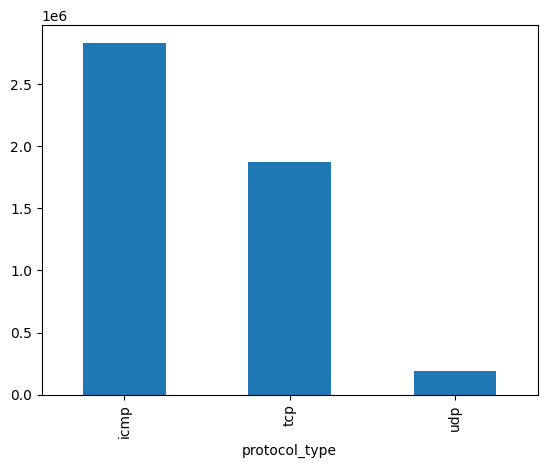

In [16]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

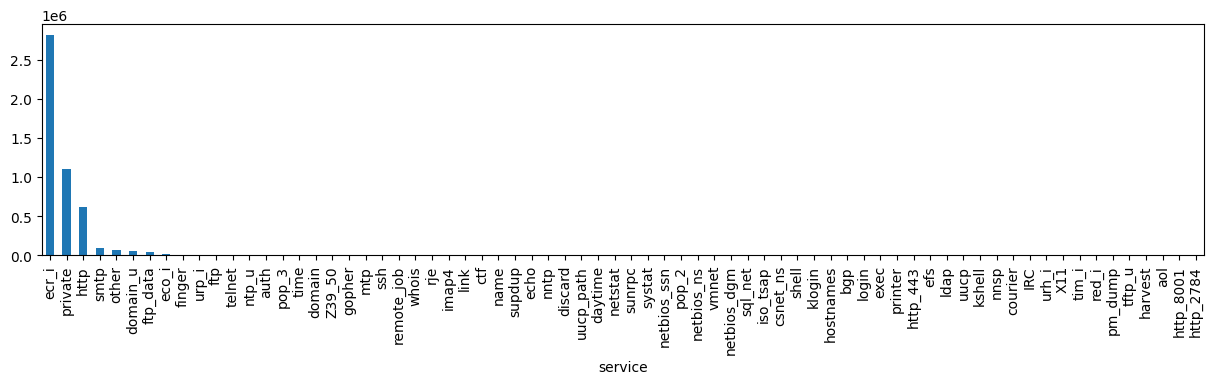

In [17]:
plt.figure(figsize=(15,3))
bar_graph('service')

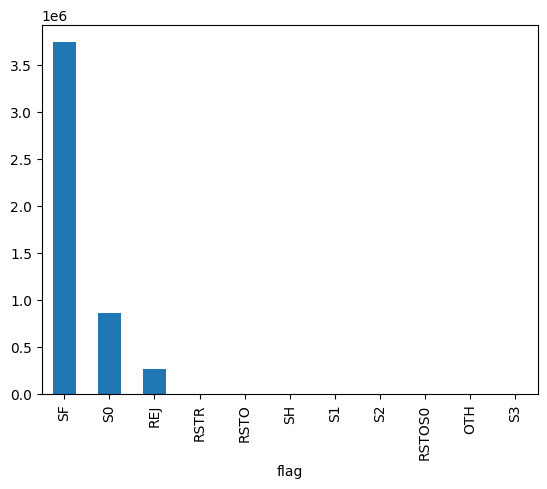

In [18]:
bar_graph('flag')

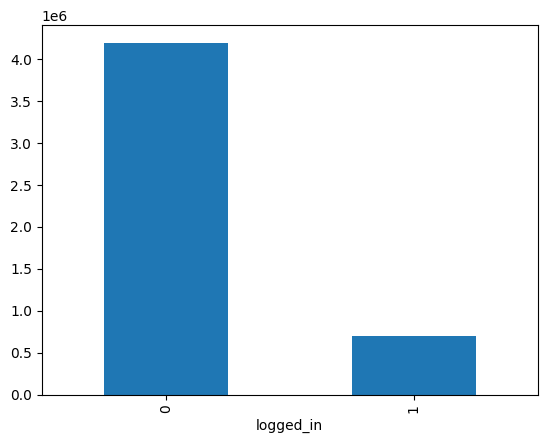

In [19]:
bar_graph('logged_in')

logged_in (1 if successfully logged in; 0 otherwise): We notice that just 70000 packets are successfully logged in.

TARGET FEATURE DISTRIBUTION

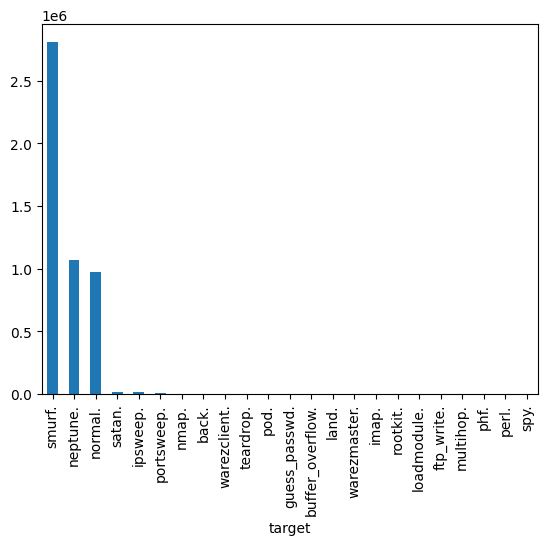

In [20]:
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

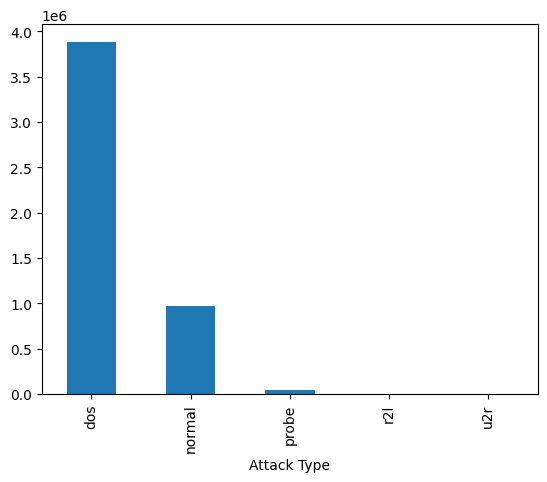

In [21]:
bar_graph('Attack Type')

In [22]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

In [23]:
df = df.dropna()# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

In [24]:
df['num_root'].corr(df['num_compromised'])

np.float64(0.9975798933478788)

In [25]:
df['srv_serror_rate'].corr(df['serror_rate'])

np.float64(0.998692413866282)

In [26]:
df['srv_count'].corr(df['count'])

np.float64(0.9433902218806605)

In [27]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9953719458068605)

In [28]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

np.float64(0.9788464524221455)

In [29]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

np.float64(0.9982859559764777)

In [30]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

np.float64(0.9869790678085133)

In [31]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

np.float64(0.9316213679070299)

In [32]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

np.float64(0.9075289446663145)

In [33]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

np.float64(0.9473596471555572)

In [34]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

np.float64(0.9990059376729266)

In [35]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.9979417182529224)

In [36]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

np.float64(0.9982509415921331)

In [37]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

np.float64(0.999391730038362)

In [38]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9897555886506412)

In [39]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.985553062456559)

In [40]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

np.float64(0.9859781723136949)

In [41]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

np.float64(0.9879088754809274)

In [42]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [43]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [44]:
df.shape

(4898431, 34)

In [45]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

FEATURE MAPPING

In [46]:
df['protocol_type'].value_counts()

protocol_type
icmp    2833545
tcp     1870598
udp      194288
Name: count, dtype: int64

In [47]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [48]:
df['flag'].value_counts()

flag
SF        3744328
S0         869829
REJ        268874
RSTR         8094
RSTO         5344
SH           1040
S1            532
S2            161
RSTOS0        122
OTH            57
S3             50
Name: count, dtype: int64

In [49]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [50]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,215,45076,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,http,0,162,4528,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,http,0,236,1228,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,http,0,233,2032,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [51]:
df.drop('service',axis = 1,inplace= True)

In [52]:
df.shape

(4898431, 33)

In [53]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,215,45076,0,0,0,0,0,...,1.0,0.0,0.0,0,0,0.0,0.00,0.0,normal.,normal
1,0,1,0,162,4528,0,0,0,0,0,...,1.0,0.0,0.0,1,1,0.0,1.00,0.0,normal.,normal
2,0,1,0,236,1228,0,0,0,0,0,...,1.0,0.0,0.0,2,2,0.0,0.50,0.0,normal.,normal
3,0,1,0,233,2032,0,0,0,0,0,...,1.0,0.0,0.0,3,3,0.0,0.33,0.0,normal.,normal
4,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,4,4,0.0,0.25,0.0,normal.,normal


In [54]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate       

MODELLING

In [55]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [56]:
feature_order = [
    'duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land', 
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
    'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations', 
    'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 
    'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
    'dst_host_srv_diff_host_rate'
]

# Get sorted list of unique labels
attack_types = sorted(df['Attack Type'].unique())
print("Attack Types:", attack_types)

# Replace label with its index in the list
df['Attack Type'] = df['Attack Type'].apply(lambda x: attack_types.index(x))

# Save for use in inference
import json
with open("attack_types.json", "w") as f:
    json.dump(attack_types, f)


Attack Types: ['dos', 'normal', 'probe', 'r2l', 'u2r']


In [57]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']].values
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4898431, 32)
(3281948, 31) (1616483, 31)
(3281948, 1) (1616483, 1)


In [58]:
# 2. PyTorch Dataset
class KDDDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long).squeeze()
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = KDDDataset(X_train, Y_train)
val_dataset = KDDDataset(X_test, Y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)


In [59]:
# 3. Define ANN Model
class ANN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=5):
        super(ANN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = ANN(input_dim=len(feature_order), num_classes=len(np.unique(Y)))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [60]:
# 4. Train
import copy
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training with early stopping
best_val_acc = 0.0
patience_counter = 0
best_model_wts = copy.deepcopy(model.state_dict())
EPOCHS = 20
PATIENCE = 5

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    train_acc = correct / total

    # Validation
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == y_batch).sum().item()
            val_total += y_batch.size(0)

    val_acc = val_correct / val_total

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Early Stopping Check
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_wts = copy.deepcopy(model.state_dict())
        torch.save(best_model_wts, "best_kdd_100_model.pt")
        print("Best model saved!")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= PATIENCE:
            print("Early stopping triggered.")
            break

# Load best weights back
model.load_state_dict(best_model_wts)
print(f"Final Best Val Accuracy: {best_val_acc:.4f}")

Epoch 1/20 | Train Acc: 0.9980 | Val Acc: 0.9993
Best model saved!
Epoch 2/20 | Train Acc: 0.9992 | Val Acc: 0.9995
Best model saved!
Epoch 3/20 | Train Acc: 0.9993 | Val Acc: 0.9995
Best model saved!
Epoch 4/20 | Train Acc: 0.9994 | Val Acc: 0.9995
Epoch 5/20 | Train Acc: 0.9994 | Val Acc: 0.9996
Best model saved!
Epoch 6/20 | Train Acc: 0.9994 | Val Acc: 0.9995
Epoch 7/20 | Train Acc: 0.9994 | Val Acc: 0.9996
Best model saved!
Epoch 8/20 | Train Acc: 0.9994 | Val Acc: 0.9996
Epoch 9/20 | Train Acc: 0.9994 | Val Acc: 0.9995
Epoch 10/20 | Train Acc: 0.9994 | Val Acc: 0.9996
Epoch 11/20 | Train Acc: 0.9994 | Val Acc: 0.9996
Epoch 12/20 | Train Acc: 0.9994 | Val Acc: 0.9996
Early stopping triggered.
Final Best Val Accuracy: 0.9996


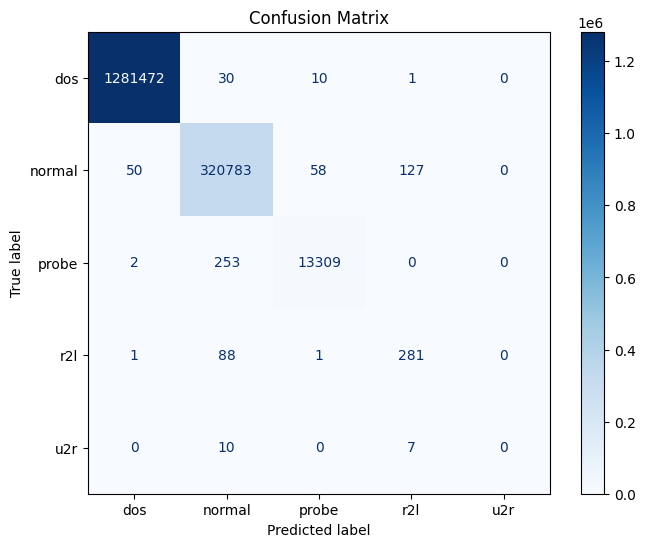

In [62]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()

y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = ['dos', 'normal', 'probe', 'r2l', 'u2r']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()